# Result analyze of psonn

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

## Load Result

In [2]:
with open('result.pkl', 'rb') as f:
    result = pickle.load(f)

In [3]:
path = result['positions']
path

[[array([0.0629346 , 0.40426832]),
  array([0.00716295, 0.58700977]),
  array([0.227778  , 0.32483591]),
  array([0.0689705 , 0.80225143]),
  array([0.28028014, 0.72706682]),
  array([0.88788632, 0.2979469 ]),
  array([0.15632905, 0.80012345]),
  array([0.31896802, 0.86236624]),
  array([0.36054873, 0.67558971]),
  array([0.63980157, 0.40070248])],
 [array([0.1629346, 0.3188079]),
  array([0.10716295, 0.5706582 ]),
  array([0.327778  , 0.23423618]),
  array([0.1689705 , 0.70225143]),
  array([0.38028014, 0.62706682]),
  array([0.93852235, 0.2227827 ]),
  array([0.25632905, 0.70012345]),
  array([0.41896802, 0.76236624]),
  array([0.46054873, 0.57558971]),
  array([0.67762577, 0.47719699])],
 [array([0.2629346, 0.2188079]),
  array([0.20716295, 0.4706582 ]),
  array([0.427778  , 0.14564052]),
  array([0.2689705 , 0.60225143]),
  array([0.48028014, 0.52706682]),
  array([0.98282888, 0.15701403]),
  array([0.35632905, 0.60012345]),
  array([0.51896802, 0.66236624]),
  array([0.56054873, 0

In [4]:
path = np.array(path)
path.shape

(20, 10, 2)

## Transfer shape

In [5]:
points = []
for i in range(10):
    point = []
    for p in path:
        point.append(p[i].copy())
    points.append(point)
    
points = np.array(points)
points.shape

(10, 20, 2)

## Plot Path of each Particles

Text(0.5, 1.0, 'Path of Particles')

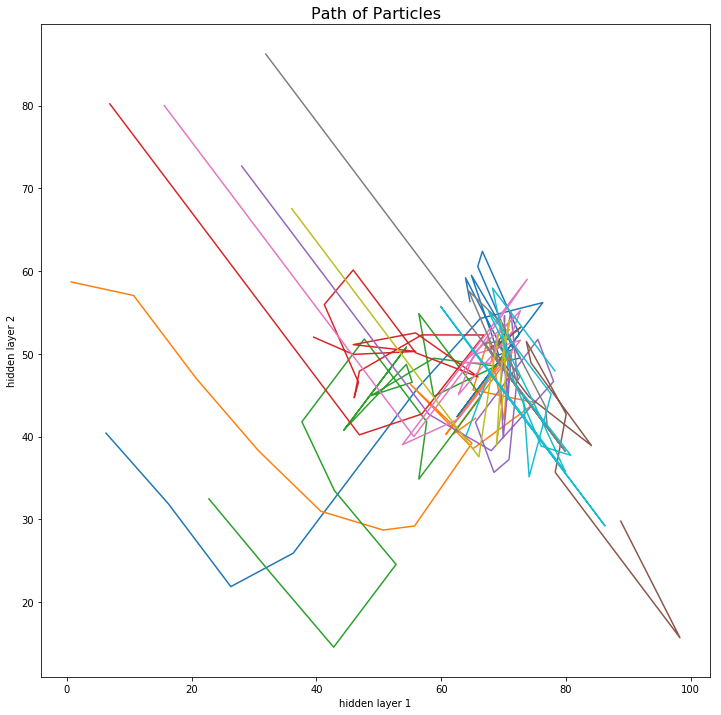

In [6]:
points = points * 100
plt.figure(figsize=(12,12))
for p in points:
    plt.plot(p[:,0], p[:,1])
plt.xlabel('hidden layer 1')
plt.ylabel('hidden layer 2')
plt.title('Path of Particles', fontsize=16)

## Plot 3d Object function space

In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [9]:
xx = np.array([])
yy = np.array([])
for p in points:
    xx = np.hstack((xx, p[:,0])) 
    yy = np.hstack((yy, p[:,1]))

## Train The best Model

In [22]:
result['values'][-1][0]

array([0.70149565, 0.51072774])

In [23]:
best_param = [int(i*100) for i in result['values'][-1][0]]
best_param

[70, 51]

### Initial Best Model

In [24]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

params = [keras.layers.Flatten(input_shape=(28, 28))]
for num_units in best_param:
    params.append(keras.layers.Dense(num_units, activation=tf.nn.relu))
    # last layer
params.append(keras.layers.Dense(10, activation=tf.nn.softmax))
    
best_model = keras.Sequential(params)

best_model.compile(optimizer=tf.train.AdamOptimizer(),
                                loss = 'sparse_categorical_crossentropy',
                                metrics=['accuracy'])

### Train Model

In [30]:
best_model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1921 - acc: 0.9278
Epoch 2/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1876 - acc: 0.9287
Epoch 3/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.1832 - acc: 0.9304
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1825 - acc: 0.9316
Epoch 5/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1763 - acc: 0.9335
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1739 - acc: 0.9343
Epoch 7/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1703 - acc: 0.9349
Epoch 8/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.1686 - acc: 0.9358
Epoch 9/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.1651 - acc: 0.9360
Epoch 10/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.1658 - acc: 0.9365

In [31]:
  _, test_acc = best_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 34us/step


In [32]:
test_acc

0.8777